In [1]:
import h5py
import numpy
import StateSpace
%matplotlib inline

In [2]:
from os.path import join
root = './VisualAttention/' # 'VisualAttention' folder from data

In [3]:
data_file = h5py.File(join(root, 'Data/deconv/S1.hdf5'), 'r')
responses = {}
for condition in data_file.keys():
    responses[condition] = numpy.array(data_file[condition])
    print('{} {}'.format(condition, responses[condition].shape))
data_file.close()

human (900, 51608)
passive (900, 51608)
vehicle (900, 51608)


In [4]:
states_file = h5py.File(join(root, 'Stimuli/states.hdf5'), 'r')
states = {}
for condition in states_file.keys():
    states[condition] = numpy.array(states_file[condition])
    print('{} {}'.format(condition, states[condition].shape))
states_file.close()

human (900, 3)
passive (900, 3)
vehicle (900, 3)


In [5]:
# stack into single arrays
responses = numpy.vstack((responses['passive'], responses['human'], responses['vehicle']))
states = numpy.vstack((states['passive'], states['human'], states['vehicle']))

In [6]:
# find state space and project into it
state_positions = StateSpace.extract_state_space_positions(states, responses)
state_positions.shape

(2700, 3)

In [7]:
# for each TR: 0 is neither, 1 is humans only, 2 is vehicles only, 3 is both
human_vehicle_presence = states[:, :2].copy()
human_vehicle_presence[:, 1] *= 2
human_vehicle_presence = human_vehicle_presence.sum(1)

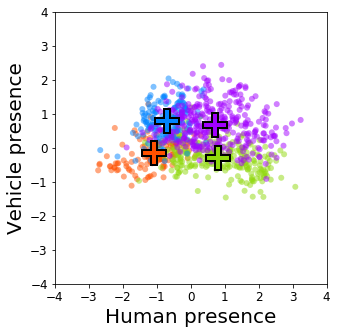

In [8]:
# plot passive
figure = StateSpace.plot_state_space_projection(state_positions[:900, :2].transpose(), 
                                                human_vehicle_presence[:900], (5, 5))

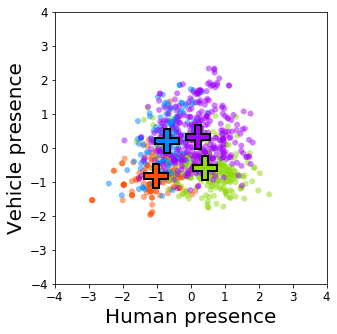

In [9]:
# plot attend-human
figure = StateSpace.plot_state_space_projection(state_positions[900:1800, :2].transpose(), 
                                                human_vehicle_presence[900:1800], (5, 5))

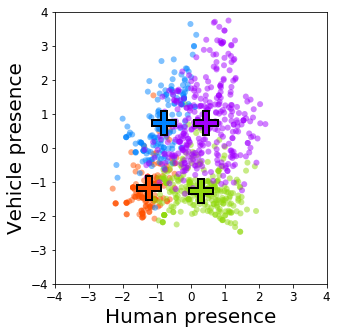

In [10]:
# plot attend-vehicle
figure = StateSpace.plot_state_space_projection(state_positions[1800:, :2].transpose(), 
                                                human_vehicle_presence[1800:], (5, 5))